In [1]:
RANDOM_SEED = 42

In [2]:
path_ = "Scalograms-stacked-wavdec"

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np

d:\Tools\Anaconda\envs\tensorflow-gpu\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\Tools\Anaconda\envs\tensorflow-gpu\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\Tools\Anaconda\envs\tensorflow-gpu\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
d:\Tools\Anaconda\envs\tensorflow-gpu\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
d:\Tools\Anaconda\envs\tensorflow-gpu\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
#Preparing images for model training --- image size = 256 x 256
train_batch = 64
test_batch = 64
train_set= image_dataset_from_directory(path_,
                                labels='inferred',
                                label_mode='binary',
                                batch_size=train_batch,
                                seed=RANDOM_SEED,
                                shuffle=True,
                                validation_split=0.2,
                                subset='training')
                                
val_set =  image_dataset_from_directory(path_,
                                labels='inferred',
                                label_mode='binary',
                                batch_size=test_batch,
                                seed=RANDOM_SEED,
                                shuffle=True,
                                validation_split=0.2,
                                subset='validation')

Found 1680 files belonging to 2 classes.
Using 1344 files for training.
Found 1680 files belonging to 2 classes.
Using 336 files for validation.


In [5]:
test_ds_size = int(int(val_set.__len__()) * 0.5) # test-test set has 478 images and val set has 1647 images == # 9563 * 0.05
test_test_set = val_set.take(test_ds_size)
test_set = val_set.skip(test_ds_size)  

In [6]:
print(val_set.__len__(), train_set.__len__(), test_set.__len__(), test_test_set.__len__(), sep='\n')

tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(21, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)


In [7]:
#from livelossplot import PlotLossesKeras
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, AveragePooling2D, BatchNormalization, Dropout, Conv3D
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras import regularizers, initializers
from livelossplot import PlotLossesKeras

In [8]:
model_1 = Sequential()

model_1.add(Conv2D(8,(3,3),input_shape=(256,256,3),activation='relu', kernel_initializer=initializers.HeNormal(), kernel_regularizer=regularizers.L2(0.01), padding='same'))
model_1.add(AveragePooling2D(pool_size=(2, 2)))
model_1.add(BatchNormalization())

model_1.add(Conv2D(8,(3,3),activation='relu', kernel_regularizer=regularizers.L2(0.01)))
model_1.add(AveragePooling2D(pool_size=(2, 2)))
model_1.add(BatchNormalization())

model_1.add(Flatten())

model_1.add(Dense(64,activation='relu', kernel_regularizer=regularizers.L2(0.1)))

model_1.add(Dense(32,activation='relu', kernel_regularizer=regularizers.L2(0.1)))

model_1.add(Dense(1,activation='sigmoid'))

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','Recall','Precision','AUC'])   

In [11]:
filepath = "Models/scalogram-base-model-checkpoints/scalogram-base-model-3.h5"

callbacks = [#EarlyStopping(monitor='val_accuracy', patience=4),
            ModelCheckpoint(filepath=filepath, monitor="val_accuracy", mode='max', save_best_only=True),
            PlotLossesKeras()]

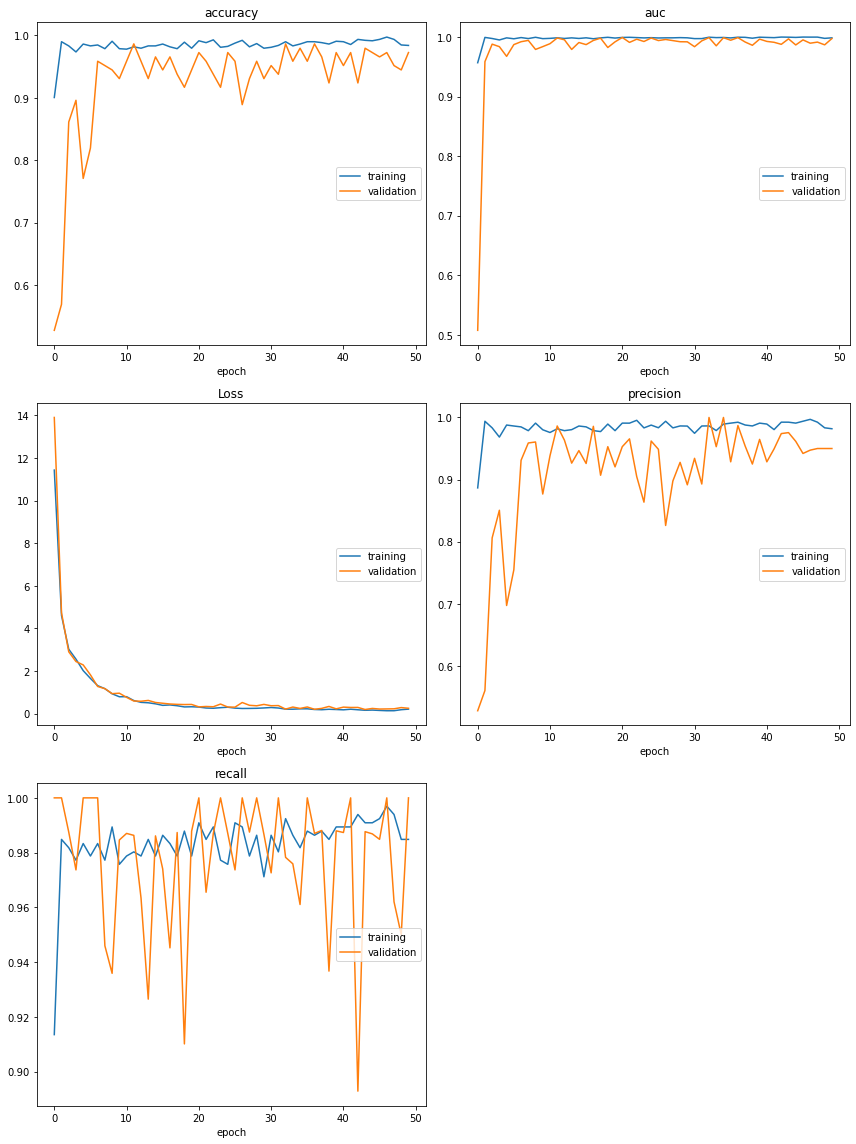

accuracy
	training         	 (min:    0.900, max:    0.997, cur:    0.984)
	validation       	 (min:    0.528, max:    0.986, cur:    0.972)
auc
	training         	 (min:    0.957, max:    1.000, cur:    0.999)
	validation       	 (min:    0.507, max:    0.999, cur:    0.997)
Loss
	training         	 (min:    0.136, max:   11.435, cur:    0.211)
	validation       	 (min:    0.194, max:   13.907, cur:    0.252)
precision
	training         	 (min:    0.887, max:    0.997, cur:    0.982)
	validation       	 (min:    0.528, max:    1.000, cur:    0.950)
recall
	training         	 (min:    0.914, max:    0.997, cur:    0.985)
	validation       	 (min:    0.893, max:    1.000, cur:    1.000)
21/21 [==============================] - 3s 147ms/step - loss: 0.2106 - accuracy: 0.9836 - recall: 0.9848 - precision: 0.9818 - auc: 0.9986 - val_loss: 0.2516 - val_accuracy: 0.9722 - val_recall: 1.0000 - val_precision: 0.9500 - val_auc: 0.9974


In [12]:
h = model_1.fit(train_set,
                epochs=50,
                #steps_per_epoch=64,
                validation_data=test_set,
                #validation_steps=32,
                callbacks=callbacks
                )

In [13]:
import pandas as pd

pd.DataFrame.from_dict(h.history).to_csv(filepath[:-2] + 'csv' , index=False)
#data=pd.read_csv("Models/scalogram-base-model-checkpoints/scalogram-base-model-1.csv")

In [14]:
model_1.evaluate(test_test_set)

3/3 [==============================] - 0s 46ms/step - loss: 0.2516 - accuracy: 0.9792 - recall: 1.0000 - precision: 0.9630 - auc: 0.9972


[0.2516484558582306,
 0.9791666865348816,
 1.0,
 0.9629629850387573,
 0.9972137808799744]

### Previous models

In [ ]:
## "scalogram-base-model-checkpoints/scalogram-base-model-1.h5"

# model_1 = Sequential()

# model_1.add(Conv2D(16,(3,3),input_shape=(256,256,3),activation='relu', kernel_initializer=initializers.HeNormal(), kernel_regularizer=regularizers.L2(0.01), padding='same'))
# model_1.add(AveragePooling2D(pool_size=(2, 2)))
# model_1.add(BatchNormalization())

# model_1.add(Conv2D(16,(3,3),activation='relu', kernel_regularizer=regularizers.L2(0.1)))
# model_1.add(AveragePooling2D(pool_size=(2, 2)))
# model_1.add(BatchNormalization())

# model_1.add(Flatten())

# model_1.add(Dense(64,activation='relu', kernel_regularizer=regularizers.L2(0.5)))

# model_1.add(Dense(32,activation='relu', kernel_regularizer=regularizers.L2(0.5)))

# model_1.add(Dense(1,activation='sigmoid'))

# model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','Recall','Precision','AUC'])   

In [ ]:
# ## "scalogram-base-model-checkpoints/scalogram-base-model-2.h5"

# model_1 = Sequential()

# model_1.add(Conv2D(8,(3,3),input_shape=(256,256,3),activation='relu', kernel_initializer=initializers.HeNormal(), kernel_regularizer=regularizers.L2(0.01), padding='same'))
# model_1.add(AveragePooling2D(pool_size=(2, 2)))
# model_1.add(BatchNormalization())

# model_1.add(Conv2D(8,(3,3),activation='relu', kernel_regularizer=regularizers.L2(0.1)))
# model_1.add(AveragePooling2D(pool_size=(2, 2)))
# model_1.add(BatchNormalization())

# model_1.add(Flatten())

# model_1.add(Dense(64,activation='relu', kernel_regularizer=regularizers.L2(0.1)))

# model_1.add(Dense(32,activation='relu', kernel_regularizer=regularizers.L2(0.1)))

# model_1.add(Dense(1,activation='sigmoid'))

# model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','Recall','Precision','AUC'])    

In [ ]:
# ## "scalogram-base-model-checkpoints/scalogram-base-model-3.h5" 

# model_1 = Sequential()

# model_1.add(Conv2D(8,(3,3),input_shape=(256,256,3),activation='relu', kernel_initializer=initializers.HeNormal(), kernel_regularizer=regularizers.L2(0.01), padding='same'))
# model_1.add(AveragePooling2D(pool_size=(2, 2)))
# model_1.add(BatchNormalization())

# model_1.add(Conv2D(8,(3,3),activation='relu', kernel_regularizer=regularizers.L2(0.01)))
# model_1.add(AveragePooling2D(pool_size=(2, 2)))
# model_1.add(BatchNormalization())

# model_1.add(Flatten())

# model_1.add(Dense(64,activation='relu', kernel_regularizer=regularizers.L2(0.1)))

# model_1.add(Dense(32,activation='relu', kernel_regularizer=regularizers.L2(0.1)))

# model_1.add(Dense(1,activation='sigmoid'))

# model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','Recall','Precision','AUC'])   

### Misc

In [ ]:
# len(dataset_to_numpy[0][0])
# dataset_to_numpy = list(val_set.as_numpy_iterator())
# # shape = tf.shape(dataset_to_numpy)
# # print(shape)